<h1>Análise de Sistemas</h1>
<br>
<h3>Objetivos</h3>
<p>Numeros Complexos</p>
<p>Resposta em frequência, Diag. de Bode, Identificação de polos e zeros</p>
<p>Conversão para o domínio do tempo</p>

<h3>Importando Libs</h3>

In [48]:
from IPython.display import display, Latex
import numpy as np
import sympy as sp
from sympy.codegen.cfunctions import log10
import matplotlib.pyplot as plt
import math

<h2>Análise de Sistemas</h2>
<h3>Definição da Função de Transferência</h3>

In [109]:
s = sp.Symbol("s")
w = sp.Symbol("w")

#Não esquecer do MAIS ++++ no começo
#Multiplicação = "." sempre depois da variavel
G = f'$\\frac{{1}}{{{w}^3+{w}^2.30+{w}.300+1000}}$'
aux = G.replace("w","s").strip("'")
T = f"T(s) = {aux}"

print("Expression:")
display(Latex(T))

Expression:


<IPython.core.display.Latex object>

<h3>Encontrando Polos e Zeros</h3>

In [110]:
T = aux
t = ''
key = 0

for i in range(len(T)):
    if T[i] == "{":
        key += 1
    elif T[i] == "f":
        t += "("
    elif T[i] == "}":
        key -= 1
        if (key == 0) and T[i+1] == "{":
            t += ")/("
        elif (key == 0) and (T[i+1] == "$"):
            t += ")"
    elif T[i] == "^":
        t += "**"
    elif T[i] == ".":
        t += "*"
    elif T[i].isnumeric() or T[i] in ["w","s","+","-"]:
        t += T[i]
# end for

#print(t)

num_t = ''
den_t = ''
trigger = False
for i in range(len(t)):
    if t[i] == "/":
        trigger = True
        continue
    if trigger == False:
        num_t += t[i]
    elif trigger == True:
        den_t += t[i]

#print(num_t,den_t)
zeros = sp.sympify(num_t)
polos = sp.sympify(den_t)

Zeros = sp.solveset(zeros,s)
Polos = sp.solveset(polos,s)

Zeros_solve = [sol.evalf(n=5)for sol in Zeros]
Polos_solve = [sol.evalf(n=5)for sol in Polos]

print("Zeros:")
for zero in Zeros_solve:
    print(f'{zero}')
print("Polos:")
for polo in Polos_solve:
    print(f'{polo}')

Zeros:
Polos:
-10.000


<h3>Tratamento e separação dos termos da FT</h3>

In [115]:
Cpx = ["j*","-","-j*",""]
g = ''
key = 0
#print(G)
for i in range(len(G)):
    if G[i] == "{":
        key += 1
    elif G[i] == "f":
        g += "("
    elif G[i] == "}":
        key -= 1
        if (key == 0) and G[i+1] == "{":
            g += ")/("
        elif (key == 0) and (G[i+1] == "$"):
            g += ")"
    elif G[i] == "^":
        g += "**"
    elif G[i] == ".":
        g += "*"
    elif G[i].isnumeric() or G[i] in ["w","s","+","-"]:
        if G[i] == "w" and G[i+1] == "^":
            if (int(G[i+2])%4 - 1 == 0) or (int(G[i+2])%4 - 1 == 3):
                g += Cpx[int(G[i+2])%4 - 1]
            else:
                if G[i-1] in ["+","{"]:
                    if G[i-1] == "+":
                        g = g.rstrip("+")
                    g += "-"
                elif G[i-1] == "-":
                    g = g.rstrip("-")
                    if G[i-2] != "{":
                        g += "+"
                if (int(G[i+2])%4 - 1) == 2:
                    g+=Cpx[0]
                      
        elif G[i] == "w":
            g += Cpx[0]
        g += G[i]
# end for

#print(g)
num = ''
den = ''
trigger = False
for i in range(len(g)):
    if g[i] == "/":
        trigger = True
        continue
    if trigger == False:
        num += g[i]
    elif trigger == True:
        den += g[i]

def getRe_Im(ep):
    number = ["",""]
    imag = 0
    for i in range(len(ep)):
        if ep[i] in ["+","-","("]:
            for j in range(len(ep)):
                if ep[i+j+1] in ["+","-",")"]:
                    imag = 0
                    break
                elif ep[i+j+1] == "j":
                    imag = 1
                    break
            if (ep[i] == "(") and (ep[i+1] != "+"):
                continue
            else:
                number[imag] += ep[i]
        else:
            if (ep[i] in ["(",")"]) or (ep[i] == "j") or (ep[i-1] == "j"):
                continue
            else:
                number[imag] += ep[i]
    
    for i in range(2):
        if number[i] == "":
            number[i] = "0"
    
    return number        
# end def

Num = getRe_Im(num)
Den = getRe_Im(den)

exp_Num = list()
exp_Den = list()

#print(Num[0], Num[1])
print(Den[0], Den[1])

for i in range(2):
    exp_Num.append(sp.sympify(Num[i]))
    exp_Den.append(sp.sympify(Den[i]))

Amp = ((exp_Num[0]**2 + exp_Num[1]**2) / (exp_Den[0]**2 + exp_Den[1]**2))**(1/2)

Phase = (sp.atan2(exp_Num[1],exp_Num[0])-sp.atan2(exp_Den[1],exp_Den[0]))*180/math.pi

print(Phase)
print(sp.atan2(-1,9))

-w**2*30+1000 -w**3+w*300
-57.2957795130823*atan2(-w**3 + 300*w, 1000 - 30*w**2)
-atan(1/9)


<h3>Definição dos parâmetros do Diagrama de Bode</h3>

In [116]:
x_range = [10**(-5),10**5]
Amp_range = [-100, 100]
Phase_range = [-180,180]

<h3>Amplitude</h3>

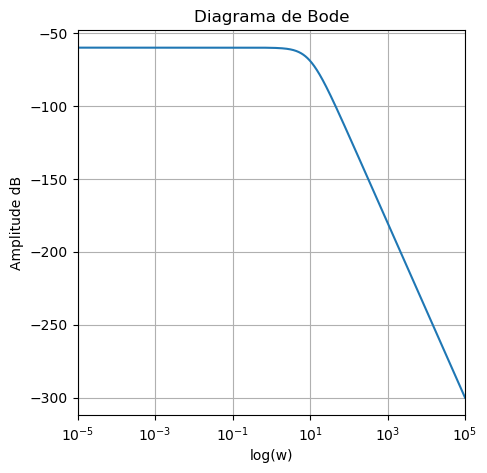

In [117]:
w_valores = np.linspace(10**(-10),10**5,10**6)
f_Amp = sp.lambdify(w,Amp,'numpy')
Amp_valores = f_Amp(w_valores)

plt.figure(figsize=(5, 5))

plt.plot(w_valores,20*np.log10(Amp_valores))
plt.xscale('log')
plt.title('Diagrama de Bode')
plt.xlabel('log(w)')
plt.ylabel('Amplitude dB')
plt.xlim(x_range[0],x_range[1])

#plt.ylim(Amp_range[0],Amp_range[1])

#plt.yticks(np.arange(Amp_range[0],Amp_range[1]+(Amp_range[1]-Amp_range[0])/10,(Amp_range[1]-Amp_range[0])/10))

plt.grid(True)
plt.show()

<h3>Fase</h3>

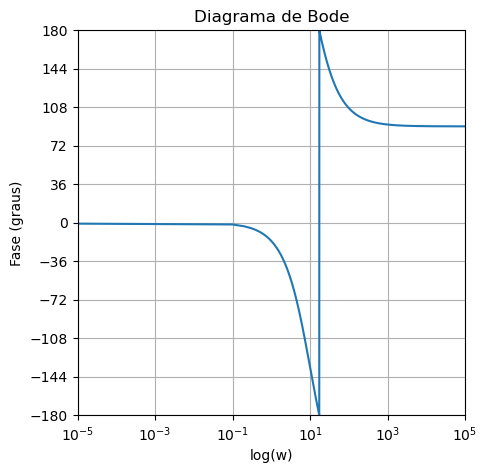

In [118]:
f_Phase = sp.lambdify(w,Phase,'numpy')
Phase_valores = f_Phase(w_valores)

plt.figure(figsize=(5, 5))

plt.plot(w_valores,Phase_valores)
plt.xscale('log')
plt.title('Diagrama de Bode')
plt.xlabel('log(w)')
plt.ylabel('Fase (graus)')
plt.xlim(x_range[0],x_range[1])

plt.ylim(Phase_range[0],Phase_range[1])
plt.yticks(np.arange(Phase_range[0],Phase_range[1]+(Phase_range[1]-Phase_range[0])/10,(Phase_range[1]-Phase_range[0])/10))
plt.grid(True)
plt.show()